# Unsupervised Learning Modeling

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.metrics import calinski_harabasz_score, silhouette_score

from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns',35)

In [3]:
# prelabeled set used for initial training
prelabeled_df = pd.read_csv('data/finalized_data/training')

# unlabeled set used for predictions after initial training
unlabeled_df = pd.read_csv('data/finalized_data/unlabeled')

In [5]:
prelabeled_df.drop('Class', axis=1, inplace=True)
unlabeled_df.drop('Class', axis=1, inplace=True)

In [77]:
prelabeled_df

,Player,GP,MIN,PTS,FGA,FG%,3PA,3P%,REB,AST,TO,STL,BLK,Close FGA,Close FG%,Mid FGA,Mid FG%,Post_Ups,Drives,CS_3PA,CS_3P%,PP100Pos,AST %,REB %,USG %,Height,Pos,TEAM
0,Aaron Gordon: 2015,78.0,23.9,9.2,7.4,47.3,1.8,29.6,6.5,1.6,0.8,0.8,0.7,4.3,60.5,1.3,31.7,0.6,2.2,1.7,30.5,18.9,10.3,13.3,16.9,81.0,PF,ORL
1,Al Horford: 2015,82.0,32.1,15.2,12.8,50.5,3.1,34.4,7.3,3.2,1.3,0.8,1.5,5.6,64.3,4.1,44.4,3.8,2.1,3.0,35.1,22.9,16.5,10.9,20.2,82.0,C,ATL
2,Al Jefferson: 2015,47.0,23.3,12.0,10.7,48.5,0.0,0.0,6.4,1.5,0.7,0.6,0.9,6.8,51.5,4.0,43.9,11.3,0.0,0.0,0.0,25.3,11.4,13.3,24.0,82.0,C,CHA
3,Andre Drummond: 2015,81.0,32.9,16.2,13.1,52.1,0.1,33.3,14.8,0.8,1.9,1.5,1.4,12.2,54.1,0.8,25.0,6.0,0.9,0.0,0.0,24.6,4.2,21.7,23.9,83.0,C,DET
4,Andrew Bogut: 2015,70.0,20.7,5.4,4.0,62.7,0.0,100.0,7.0,2.3,1.2,0.5,1.6,3.8,65.8,0.1,30.0,2.5,0.1,0.0,0.0,12.4,14.5,16.3,11.5,84.0,C,GSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,Nikola Vucevic: 2020,44.0,34.1,24.5,20.6,48.0,6.5,40.6,11.8,3.8,1.9,1.0,0.6,8.5,55.3,5.6,46.0,11.1,3.5,6.5,40.6,34.7,21.3,16.8,29.9,83.0,C,CHI
348,Patty Mills: 2020,40.0,25.6,13.1,10.3,44.3,6.9,39.5,1.8,2.6,1.1,0.7,0.0,2.1,57.1,1.3,50.9,0.0,3.8,4.1,43.9,24.0,14.7,3.1,19.4,73.0,PG,SAS
349,Stephen Curry: 2020,39.0,33.7,29.0,20.2,47.5,11.4,40.8,5.3,6.2,3.1,1.4,0.1,6.5,60.0,2.3,46.6,0.2,10.2,5.0,41.8,38.9,30.4,7.4,30.7,75.0,PG,GSW
350,Victor Oladipo: 2020,29.0,33.4,20.8,18.4,41.1,7.7,33.3,5.0,4.7,2.4,1.3,0.4,8.2,51.2,2.6,29.7,0.0,12.9,3.6,39.4,29.7,23.6,7.2,28.9,76.0,SG,MIA


In [8]:
df = pd.concat([prelabeled_df, unlabeled_df])
df

,Player,GP,MIN,PTS,FGA,FG%,3PA,3P%,REB,AST,...,Drives,CS_3PA,CS_3P%,PP100Pos,AST %,REB %,USG %,Height,Pos,TEAM
0,Aaron Gordon: 2015,78.0,23.9,9.2,7.4,47.3,1.8,29.6,6.5,1.6,...,2.2,1.7,30.5,18.9,10.3,13.3,16.9,81.0,PF,ORL
1,Al Horford: 2015,82.0,32.1,15.2,12.8,50.5,3.1,34.4,7.3,3.2,...,2.1,3.0,35.1,22.9,16.5,10.9,20.2,82.0,C,ATL
2,Al Jefferson: 2015,47.0,23.3,12.0,10.7,48.5,0.0,0.0,6.4,1.5,...,0.0,0.0,0.0,25.3,11.4,13.3,24.0,82.0,C,CHA
3,Andre Drummond: 2015,81.0,32.9,16.2,13.1,52.1,0.1,33.3,14.8,0.8,...,0.9,0.0,0.0,24.6,4.2,21.7,23.9,83.0,C,DET
4,Andrew Bogut: 2015,70.0,20.7,5.4,4.0,62.7,0.0,100.0,7.0,2.3,...,0.1,0.0,0.0,12.4,14.5,16.3,11.5,84.0,C,GSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,Wayne Ellington: 2020,31.0,23.2,10.7,8.0,45.8,6.4,43.1,1.8,1.5,...,1.9,4.0,41.6,22.4,9.4,3.9,16.8,76.0,SG,DET
1027,Wendell Carter Jr: 2020,32.0,24.7,10.9,7.9,51.2,0.7,36.4,7.8,2.2,...,1.0,0.7,36.4,20.6,12.6,15.4,18.5,82.0,C,ORL
1028,Wesley Matthews: 2020,37.0,20.1,4.5,4.1,35.9,3.3,34.7,1.4,1.0,...,1.2,2.8,34.3,10.7,6.5,3.5,10.1,76.0,SG,LAL
1029,Will Barton: 2020,41.0,30.7,12.7,11.0,43.5,4.7,37.7,4.1,3.1,...,6.1,2.9,39.2,20.1,13.2,6.8,19.0,78.0,SF,DEN


In [43]:
ss = StandardScaler()

In [45]:
predictors = df.drop(['Player', 'GP', 'TEAM'], axis=1)
predictors = pd.get_dummies(predictors)
predictors

,MIN,PTS,FGA,FG%,3PA,3P%,REB,AST,TO,STL,...,PP100Pos,AST %,REB %,USG %,Height,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,23.9,9.2,7.4,47.3,1.8,29.6,6.5,1.6,0.8,0.8,...,18.9,10.3,13.3,16.9,81.0,0,1,0,0,0
1,32.1,15.2,12.8,50.5,3.1,34.4,7.3,3.2,1.3,0.8,...,22.9,16.5,10.9,20.2,82.0,1,0,0,0,0
2,23.3,12.0,10.7,48.5,0.0,0.0,6.4,1.5,0.7,0.6,...,25.3,11.4,13.3,24.0,82.0,1,0,0,0,0
3,32.9,16.2,13.1,52.1,0.1,33.3,14.8,0.8,1.9,1.5,...,24.6,4.2,21.7,23.9,83.0,1,0,0,0,0
4,20.7,5.4,4.0,62.7,0.0,100.0,7.0,2.3,1.2,0.5,...,12.4,14.5,16.3,11.5,84.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,23.2,10.7,8.0,45.8,6.4,43.1,1.8,1.5,0.7,0.4,...,22.4,9.4,3.9,16.8,76.0,0,0,0,0,1
1027,24.7,10.9,7.9,51.2,0.7,36.4,7.8,2.2,1.5,0.6,...,20.6,12.6,15.4,18.5,82.0,1,0,0,0,0
1028,20.1,4.5,4.1,35.9,3.3,34.7,1.4,1.0,0.5,0.5,...,10.7,6.5,3.5,10.1,76.0,0,0,0,0,1
1029,30.7,12.7,11.0,43.5,4.7,37.7,4.1,3.1,1.7,0.9,...,20.1,13.2,6.8,19.0,78.0,0,0,0,1,0


In [19]:
predictors_no_pos = df.drop(['Player', 'GP', 'TEAM', 'Pos'], axis=1)

In [70]:
predictors_scaled = ss.fit_transform(predictors_no_pos)
predictors_scaled = pd.DataFrame(predictors_scaled, columns=predictors_no_pos.columns)

In [71]:
predictors_scaled

,MIN,PTS,FGA,FG%,3PA,3P%,REB,AST,TO,STL,...,Mid FG%,Post_Ups,Drives,CS_3PA,CS_3P%,PP100Pos,AST %,REB %,USG %,Height
0,-0.878299,-0.735668,-0.797310,0.197616,-0.828947,-0.304096,0.555806,-0.689773,-1.067040,-0.286707,...,-0.621926,-0.353804,-0.731458,-0.543946,-0.335079,-0.517444,-0.583652,1.075683,-0.586310,0.700175
1,0.873664,0.327050,0.524819,0.725357,-0.249490,0.146117,0.868867,0.114024,-0.447824,-0.286707,...,0.696773,1.089992,-0.753816,0.324041,0.064881,0.091288,0.077080,0.497142,0.020241,0.994325
2,-1.006491,-0.239733,0.010657,0.395519,-1.631273,-3.080409,0.516674,-0.740010,-1.190884,-0.816455,...,0.644855,4.473889,-1.223322,-1.679006,-2.986984,0.456526,-0.466425,1.075683,0.718694,0.994325
3,1.044587,0.504170,0.598270,0.989227,-1.586699,0.042943,3.803806,-1.091671,0.295236,1.567410,...,-1.317618,2.082601,-1.022105,-1.679006,-2.986984,0.349999,-1.233727,3.100576,0.700314,1.288476
4,-1.561991,-1.408723,-1.629761,2.737366,-1.631273,6.299028,0.751469,-0.338112,-0.571667,-1.081329,...,-0.798445,0.503450,-1.200964,-1.679006,-2.986984,-1.506632,-0.136059,1.798859,-1.578849,1.582626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,-1.027856,-0.469988,-0.650407,-0.049762,1.221440,0.962128,-1.283422,-0.740010,-1.190884,-1.346203,...,0.239901,-0.624516,-0.798531,0.991723,0.630041,0.015196,-0.679564,-1.190269,-0.604691,-0.770576
1379,-0.707375,-0.434564,-0.674891,0.840800,-1.319258,0.333706,1.064529,-0.388349,-0.200137,-0.816455,...,0.084149,0.503450,-0.999748,-1.211628,0.177913,-0.258733,-0.338542,1.581906,-0.292225,0.994325
1380,-1.690184,-1.568131,-1.605278,-1.682458,-0.160343,0.174255,-1.439953,-0.991197,-1.438570,-1.081329,...,-1.836790,-0.489160,-0.955033,0.190504,-0.004677,-1.765343,-0.988616,-1.286692,-1.836174,-0.770576
1381,0.574548,-0.115749,0.084109,-0.429075,0.463688,0.455639,-0.383374,0.063786,0.047549,-0.021833,...,0.416419,-0.624516,0.140482,0.257272,0.421366,-0.334824,-0.274600,-0.491198,-0.200323,-0.182275


In [57]:
k_means_5 = KMeans(n_clusters=5).fit(predictors_scaled)
k_means_6 = KMeans(n_clusters=6).fit(predictors_scaled)
k_means_7 = KMeans(n_clusters=7).fit(predictors_scaled)
k_means_8 = KMeans(n_clusters=8).fit(predictors_scaled)
k_means_9 = KMeans(n_clusters=9).fit(predictors_scaled)
k_means_10 = KMeans(n_clusters=10).fit(predictors_scaled)
k_means_11 = KMeans(n_clusters=11).fit(predictors_scaled)
k_means_12 = KMeans(n_clusters=12).fit(predictors_scaled)
k_means_13 = KMeans(n_clusters=13).fit(predictors_scaled)
k_means_14 = KMeans(n_clusters=14).fit(predictors_scaled)
k_means_15 = KMeans(n_clusters=15).fit(predictors_scaled)

k_list = [k_means_5, k_means_6, k_means_7, k_means_8, k_means_9, k_means_10,
          k_means_11, k_means_12, k_means_13, k_means_14, k_means_15]

In [59]:
CH_score = []

for model in k_list:
    labels = model.labels_
    CH_score.append(calinski_harabasz_score(predictors_scaled, labels))

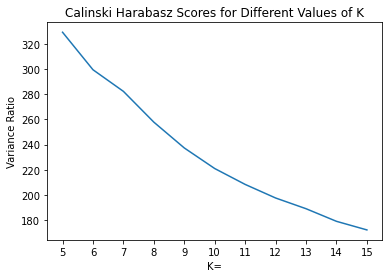

In [60]:
plt.plot([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], CH_score)
plt.xticks([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
plt.title('Calinski Harabasz Scores for Different Values of K')
plt.ylabel('Variance Ratio')
plt.xlabel('K=')
plt.show()

In [63]:
wcss_score = []

for model in k_list:
    labels = model.labels_
    wcss_score.append(model.inertia_)

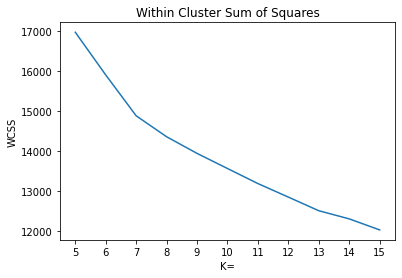

In [64]:
plt.plot([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], wcss_score)
plt.xticks([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
plt.title('Within Cluster Sum of Squares')
plt.ylabel('WCSS')
plt.xlabel('K=')
plt.show()

In [61]:
sil_score = []

for model in k_list:
    labels = model.labels_
    sil_score.append(silhouette_score(predictors_scaled, labels))

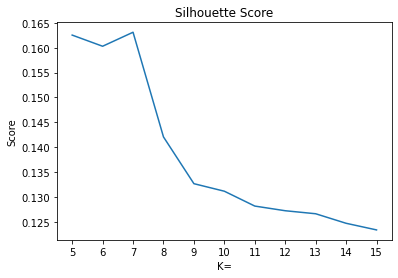

In [62]:
plt.plot([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], sil_score)
plt.xticks([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
plt.title('Silhouette Score')
plt.ylabel('Score')
plt.xlabel('K=')
plt.show()

In [82]:
k_means_7.labels_

array([6, 6, 0, ..., 5, 1, 3], dtype=int32)

In [74]:
df['Class']=k_means_7.labels_

#Analyze labels
clusters=pd.DataFrame(columns=(predictors_scaled.columns))
for i in range(7):
    a=df[df['Class']==i].mean()
    clusters=clusters.append(a, ignore_index=True)
    

In [78]:
clusters

,MIN,PTS,FGA,FG%,3PA,3P%,REB,AST,TO,STL,BLK,Close FGA,Close FG%,Mid FGA,Mid FG%,Post_Ups,Drives,CS_3PA,CS_3P%,PP100Pos,AST %,REB %,USG %,Height,Class,GP
0,26.633945,10.983486,7.844037,57.562385,0.067890,2.695413,9.025688,1.575229,1.488073,0.730275,1.195413,6.867890,60.593578,0.900917,31.397248,2.584404,0.977982,0.051376,2.205505,19.845872,8.965138,16.360550,17.144954,82.908257,0.0,64.642202
1,30.423846,15.163462,12.405769,43.916154,5.349615,36.945769,4.459615,2.467692,1.581538,0.895000,0.385000,4.800769,53.158077,2.265385,38.746154,0.971154,5.782692,3.907692,38.467692,24.016923,12.501538,7.153462,21.330385,78.515385,1.0,60.730769
2,26.320305,10.688325,9.237056,42.803553,3.091878,33.947208,3.293909,4.570558,1.829442,0.994924,0.265990,4.308629,49.688832,1.845178,38.447208,0.228934,8.483249,1.882234,35.864975,19.524365,25.575127,6.050761,19.470558,74.908629,2.0,59.456853
3,33.670430,22.189785,17.122581,45.584946,5.848387,35.825806,4.937634,6.042473,2.886022,1.301613,0.398925,7.611290,53.845161,3.666667,41.637634,0.909140,13.286559,2.459140,39.222581,31.482796,29.045161,7.123656,28.016667,76.032258,3.0,60.774194
4,32.843617,21.328723,15.902128,49.760638,3.318085,34.042553,9.246809,3.727660,2.519149,0.985106,1.195745,8.711702,58.081915,3.886170,39.981915,7.194681,4.687234,2.580851,35.802128,31.258511,18.487234,13.900000,27.124468,82.531915,4.0,59.808511
5,24.562398,8.532698,7.202180,42.923433,3.657493,36.009809,3.566485,1.686104,0.961580,0.770572,0.359128,2.537330,53.814986,1.014714,35.834332,0.288556,2.821526,3.009537,37.172207,16.704632,9.905177,7.039782,15.176567,78.275204,5.0,60.626703
6,25.742353,11.522941,8.911176,51.321765,1.835294,33.848235,6.685294,1.793529,1.398235,0.766471,0.917059,5.638824,59.680000,1.445294,37.648235,2.257059,1.991765,1.652353,34.711176,21.544118,10.458235,12.777059,18.842941,81.741176,6.0,63.405882


In [96]:
cols = (list(predictors_scaled.columns))
cols.insert(0, 'Class')

In [98]:
#Show information we want
cluster_comparison = clusters[cols].round(2)
cluster_comparison

,Class,MIN,PTS,FGA,FG%,3PA,3P%,REB,AST,TO,STL,BLK,Close FGA,Close FG%,Mid FGA,Mid FG%,Post_Ups,Drives,CS_3PA,CS_3P%,PP100Pos,AST %,REB %,USG %,Height
0,0.0,26.63,10.98,7.84,57.56,0.07,2.70,9.03,1.58,1.49,0.73,1.20,6.87,60.59,0.90,31.40,2.58,0.98,0.05,2.21,19.85,8.97,16.36,17.14,82.91
1,1.0,30.42,15.16,12.41,43.92,5.35,36.95,4.46,2.47,1.58,0.90,0.38,4.80,53.16,2.27,38.75,0.97,5.78,3.91,38.47,24.02,12.50,7.15,21.33,78.52
2,2.0,26.32,10.69,9.24,42.80,3.09,33.95,3.29,4.57,1.83,0.99,0.27,4.31,49.69,1.85,38.45,0.23,8.48,1.88,35.86,19.52,25.58,6.05,19.47,74.91
3,3.0,33.67,22.19,17.12,45.58,5.85,35.83,4.94,6.04,2.89,1.30,0.40,7.61,53.85,3.67,41.64,0.91,13.29,2.46,39.22,31.48,29.05,7.12,28.02,76.03
4,4.0,32.84,21.33,15.90,49.76,3.32,34.04,9.25,3.73,2.52,0.99,1.20,8.71,58.08,3.89,39.98,7.19,4.69,2.58,35.80,31.26,18.49,13.90,27.12,82.53
5,5.0,24.56,8.53,7.20,42.92,3.66,36.01,3.57,1.69,0.96,0.77,0.36,2.54,53.81,1.01,35.83,0.29,2.82,3.01,37.17,16.70,9.91,7.04,15.18,78.28
6,6.0,25.74,11.52,8.91,51.32,1.84,33.85,6.69,1.79,1.40,0.77,0.92,5.64,59.68,1.45,37.65,2.26,1.99,1.65,34.71,21.54,10.46,12.78,18.84,81.74


In [99]:
# list of good teams and bad teams (top and bottom 8)
good_2015 = ['GSW', 'SAS', 'CLE', 'TOR', 'OKC', 'LAC', 'ATL', 'BOS']
bad_2015 = ['PHI', 'LAL', 'BRK', 'PHO', 'MIN', 'NOP', 'NYK', 'SAC']

good_2016 = ['GSW', 'SAS', 'HOU', 'BOS', 'CLE', 'LAC', 'TOR', 'UTA']
bad_2016 = ['BRK', 'PHO', 'LAL', 'PHI', 'ORL', 'NYK', 'MIN', 'SAC']

good_2017 = ['HOU', 'TOR', 'GSW', 'BOS', 'PHI', 'CLE', 'POR', 'IND']
bad_2017 = ['PHO', 'MEM', 'DAL', 'ATL', 'ORL', 'SAC', 'CHI', 'BRK']

good_2018 = ['MIL', 'TOR', 'GSW', 'DEN', 'HOU', 'POR', 'PHI','UTA']
bad_2018 = ['NYK', 'PHO', 'CLE', 'CHI', 'ATL', 'WAS', 'NOP', 'MEM']

good_2019 = ['MIL', 'TOR', 'LAL', 'LAC', 'BOS', 'DEN', 'IND', 'HOU']
bad_2019 = ['GSW', 'MIN', 'CLE', 'DET', 'ATL', 'NYK', 'CHI', 'CHA']

good_2020 = ['UTA', 'PHI', 'PHO', 'LAC', 'MIL', 'BRK', 'LAL', 'DEN']
bad_2020 = ['MIN', 'DET', 'ORL', 'HOU', 'WAS', 'CLE', 'TOR', 'OKC']